In [1]:
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


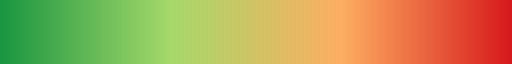

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230919_sapphire_bsui'
subfolder = glob.glob(cwd + '/**Cs_Br**')
subfolder.sort()
# # del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230919_sapphire_bsui/Cs_Br_66mM_dilute_01
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230919_sapphire_bsui/Cs_Br_66mM_dilute_02
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230919_sapphire_bsui/Cs_Br_66mM_dilute_04
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230919_sapphire_bsui/Cs_Br_66mM_dilute_06
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230919_sapphire_bsui/Cs_Br_66mM_dilute_08
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230919_sapphire_bsui/Cs_Br_66mM_dilute_10


In [6]:
dilute_list = [os.path.basename(i) for i in subfolder]
dilute_list
# np.float32(re.findall(r'\d+', dilute_list[0]))

['Cs_Br_66mM_dilute_01',
 'Cs_Br_66mM_dilute_02',
 'Cs_Br_66mM_dilute_04',
 'Cs_Br_66mM_dilute_06',
 'Cs_Br_66mM_dilute_08',
 'Cs_Br_66mM_dilute_10']

In [7]:
dilute_ratio = []
for i in range(len(dilute_list)):
    rates = np.float32(re.findall(r'\d+', dilute_list[i]))
    # c = rates[:2].sum() / rates.sum()
    c = 1/rates[-1]
    dilute_ratio.append(c)
dilute_ratio

[1.0, 0.5, 0.25, 0.16666666666666666, 0.125, 0.1]

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [8]:
df = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# integration_time = ['300ms']

# for i in range(len(subfolder)):
for i in range(len(dilute_list)):
    data_files = glob.glob(subfolder[i] + f'/**fluorescence**/**.csv')
    data_files.sort()
    # del data_files[-1]
    # suffix = os.path.basename(subfolder_PL[i])
    suffix = dilute_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 8 ## skip 23 rows if data processed by dioptas or ## 8
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):        
        # df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
        # df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
        df_temp = pd.concat([df_temp, df_int['Fluorescence']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df[f'x_{suffix}'] = df_int['Wavelength']
    df[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

In [9]:
i

5

## Export PL of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [10]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df.to_csv('20230829_CsPbBr_PL.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [11]:
df

,x_Cs_Br_66mM_dilute_01,Cs_Br_66mM_dilute_01_mean,x_Cs_Br_66mM_dilute_02,Cs_Br_66mM_dilute_02_mean,x_Cs_Br_66mM_dilute_04,Cs_Br_66mM_dilute_04_mean,x_Cs_Br_66mM_dilute_06,Cs_Br_66mM_dilute_06_mean,x_Cs_Br_66mM_dilute_08,Cs_Br_66mM_dilute_08_mean,x_Cs_Br_66mM_dilute_10,Cs_Br_66mM_dilute_10_mean
0,197.742294,1.759259,197.742294,1.938272,197.742294,1.949074,197.742294,1.919753,197.742294,1.628086,197.742294,1.921296
1,198.544478,2.290123,198.544478,2.271605,198.544478,2.433642,198.544478,2.179012,198.544478,2.260802,198.544478,2.671296
2,199.346597,3.104938,199.346597,2.740741,199.346597,2.668210,199.346597,2.660494,199.346597,2.964506,199.346597,2.671296
3,200.148650,1.759259,200.148650,2.333333,200.148650,1.998457,200.148650,1.907407,200.148650,2.084877,200.148650,1.933642
4,200.950637,0.509259,200.950637,0.858025,200.950637,0.729938,200.950637,0.675926,200.950637,2.109568,200.950637,0.766975
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.769837,1.324074,990.769837,1.148148,990.769837,0.936728,990.769837,1.907407,990.769837,0.905864,990.769837,1.449074
1040,991.489165,1.117284,991.489165,1.592593,991.489165,1.483025,991.489165,1.104938,991.489165,1.112654,991.489165,1.226852
1041,992.208398,0.666667,992.208398,0.425926,992.208398,0.381173,992.208398,0.216049,992.208398,0.470679,992.208398,0.393519
1042,992.927537,1.895062,992.927537,1.395062,992.927537,1.862654,992.927537,1.364198,992.927537,1.850309,992.927537,2.168210


## Check data in pd dataframe

In [12]:
df.keys()

Index(['x_Cs_Br_66mM_dilute_01', 'Cs_Br_66mM_dilute_01_mean',
       'x_Cs_Br_66mM_dilute_02', 'Cs_Br_66mM_dilute_02_mean',
       'x_Cs_Br_66mM_dilute_04', 'Cs_Br_66mM_dilute_04_mean',
       'x_Cs_Br_66mM_dilute_06', 'Cs_Br_66mM_dilute_06_mean',
       'x_Cs_Br_66mM_dilute_08', 'Cs_Br_66mM_dilute_08_mean',
       'x_Cs_Br_66mM_dilute_10', 'Cs_Br_66mM_dilute_10_mean'],
      dtype='object')

In [13]:
df.shape

(1044, 12)

## Prepare keys for average scans in pd dataframe

In [14]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_Cs_Br_66mM_dilute_01',
 'Cs_Br_66mM_dilute_01_mean',
 'x_Cs_Br_66mM_dilute_02',
 'Cs_Br_66mM_dilute_02_mean',
 'x_Cs_Br_66mM_dilute_04',
 'Cs_Br_66mM_dilute_04_mean',
 'x_Cs_Br_66mM_dilute_06',
 'Cs_Br_66mM_dilute_06_mean',
 'x_Cs_Br_66mM_dilute_08',
 'Cs_Br_66mM_dilute_08_mean',
 'x_Cs_Br_66mM_dilute_10',
 'Cs_Br_66mM_dilute_10_mean']

In [15]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Cs_Br_66mM_dilute_01_mean
Cs_Br_66mM_dilute_02_mean
Cs_Br_66mM_dilute_04_mean
Cs_Br_66mM_dilute_06_mean
Cs_Br_66mM_dilute_08_mean
Cs_Br_66mM_dilute_10_mean


## Plot all PL scans together

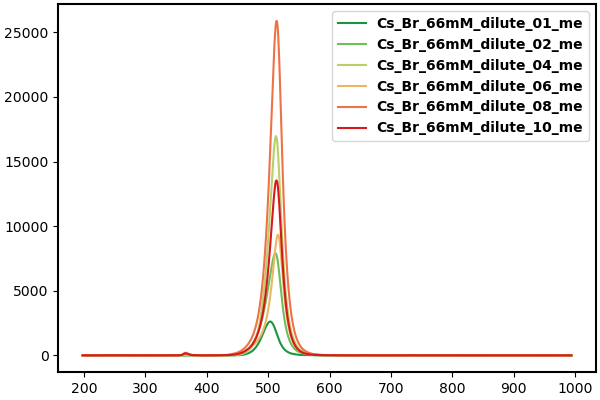

In [16]:
f1, ax1 = plt.subplots(1, 1, figsize = (6, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 23

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    # t = re.findall(r'\d+', title[i])[-1]
    ax1.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])
        
legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)
# ax1[1].legend(prop=legend_properties)

# ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [17]:
new_dir = cwd + '/plqy'

try:
    os.mkdir(new_dir)
except FileExistsError:
    pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [18]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    simpson_int.append(integrate.simpson(y, x))

df_int = pd.DataFrame()
df_int['Data_source'] = [title[i] for i in range(len(title))]
df_int['Simpson_integrate'] = simpson_int
df_int

,Data_source,Simpson_integrate
0,Cs_Br_66mM_dilute_01_mean,86737.253442
1,Cs_Br_66mM_dilute_02_mean,267140.383790
2,Cs_Br_66mM_dilute_04_mean,495087.102740
3,Cs_Br_66mM_dilute_06_mean,280285.495962
4,Cs_Br_66mM_dilute_08_mean,769646.616997
5,Cs_Br_66mM_dilute_10_mean,400476.826127


## Save Simpson integrate of PL peak

In [19]:
# df_int.to_csv(os.path.join(new_dir, 'Cs_Br_66mM_sapphire_simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [20]:
# df_int.to_csv('Cs_Br_66mM_sapphire_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

### Read Abs data into pandas dataframe

In [21]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df2 = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# integration_time = ['20ms']

# for i in range(len(subfolder)):
for i in range(len(dilute_list)):
    # data_files = subfolder
    data_files = glob.glob(subfolder[i] + f'/**absorbance**/**.csv')
    data_files.sort()
    # del data_files[0]
    # suffix = os.path.basename(subfolder_PL[i])
    suffix = dilute_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 8 ## skip 23 rows if data processed by dioptas or ## 8
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):        
        # df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'Abs_{k:03d}'])
        # df_temp = pd.concat([df_temp, df_int[f'Abs_{k:03d}']], axis=1, ignore_index=False)
        df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
        df_temp = pd.concat([df_temp, df_int['Absorbance']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df2[f'x_{suffix}'] = df_int['Wavelength']
    df2[f'{suffix}_mean'] = df_temp.mean(axis=1)


In [22]:
i

5

## Export Absorbance of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [23]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df2.to_csv('20230829_CsPbBr_abs.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [24]:
df2

,x_Cs_Br_66mM_dilute_01,Cs_Br_66mM_dilute_01_mean,x_Cs_Br_66mM_dilute_02,Cs_Br_66mM_dilute_02_mean,x_Cs_Br_66mM_dilute_04,Cs_Br_66mM_dilute_04_mean,x_Cs_Br_66mM_dilute_06,Cs_Br_66mM_dilute_06_mean,x_Cs_Br_66mM_dilute_08,Cs_Br_66mM_dilute_08_mean,x_Cs_Br_66mM_dilute_10,Cs_Br_66mM_dilute_10_mean
0,197.742294,0.538789,197.742294,0.338569,197.742294,0.212720,197.742294,0.349716,197.742294,-0.146843,197.742294,0.545814
1,198.544478,0.283538,198.544478,0.269962,198.544478,0.256691,198.544478,0.280765,198.544478,0.105034,198.544478,0.344328
2,199.346597,-0.119012,199.346597,-0.202610,199.346597,-0.185962,199.346597,-0.148050,199.346597,-0.342032,199.346597,-0.085625
3,200.148650,0.718193,200.148650,0.340487,200.148650,0.261357,200.148650,0.491832,200.148650,-0.120932,200.148650,0.854048
4,200.950637,0.385457,200.950637,0.260089,200.950637,0.267306,200.950637,0.316157,200.950637,0.001820,200.950637,0.433472
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.769837,0.307273,990.769837,0.198311,990.769837,0.201715,990.769837,0.258165,990.769837,-0.035482,990.769837,0.352253
1040,991.489165,0.357341,991.489165,0.230040,991.489165,0.230690,991.489165,0.291317,991.489165,-0.032614,991.489165,0.404507
1041,992.208398,-0.203972,992.208398,-0.244869,992.208398,-0.325810,992.208398,-0.117887,992.208398,-0.469207,992.208398,-0.164034
1042,992.927537,-0.095375,992.927537,-0.039775,992.927537,-0.088017,992.927537,-0.235205,992.927537,0.072869,992.927537,-0.136164


## Prepare keys for average scans in pd dataframe

In [25]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_Cs_Br_66mM_dilute_01',
 'Cs_Br_66mM_dilute_01_mean',
 'x_Cs_Br_66mM_dilute_02',
 'Cs_Br_66mM_dilute_02_mean',
 'x_Cs_Br_66mM_dilute_04',
 'Cs_Br_66mM_dilute_04_mean',
 'x_Cs_Br_66mM_dilute_06',
 'Cs_Br_66mM_dilute_06_mean',
 'x_Cs_Br_66mM_dilute_08',
 'Cs_Br_66mM_dilute_08_mean',
 'x_Cs_Br_66mM_dilute_10',
 'Cs_Br_66mM_dilute_10_mean']

In [26]:
# title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
title = keys_list2[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Cs_Br_66mM_dilute_01_mean
Cs_Br_66mM_dilute_02_mean
Cs_Br_66mM_dilute_04_mean
Cs_Br_66mM_dilute_06_mean
Cs_Br_66mM_dilute_08_mean
Cs_Br_66mM_dilute_10_mean


## Plot all Abs scans together

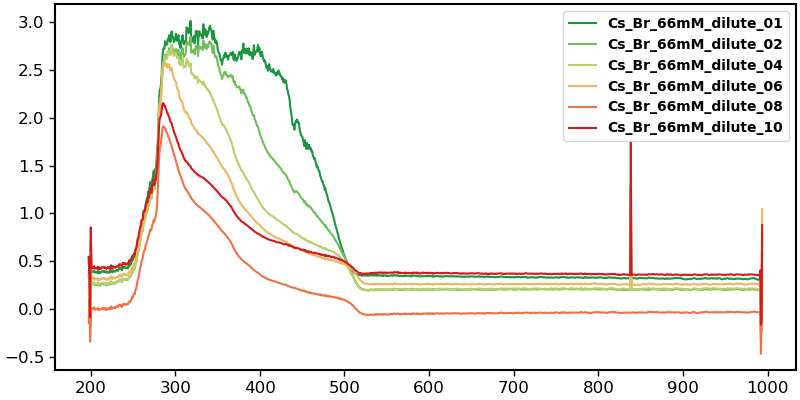

In [27]:
f2, ax2 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax2.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Try linear fitting

In [28]:
def line_2D(x, slope, y_intercept):
    y = x*slope + y_intercept
    return y


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def fit_line_2D(x, y, fit_function, x_range=[500, 900], maxfev=10000, plot=True):
    x = np.asarray(x)
    y = np.asarray(y)
    y = np.nan_to_num(y, nan=0)
    
    try:        
        idx0, _ = find_nearest(x, x_range[0])
        idx1, _ = find_nearest(x, x_range[1])
    except (TypeError, IndexError):
        idx0 = 0
        idx1 = -1
    
    slope = (y[idx1]-y[idx0]) / (x[idx1]-x[idx0])
    y_intercept = np.mean(y[idx0:idx1])
    
    try:
        initial_guess = [slope, y_intercept]
    except (TypeError, IndexError):
        initial_guess = [0.01, 0]
    
    try:
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
    except RuntimeError:
        maxfev=1000000
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
        
    if plot:
        plt.figure()
        plt.plot(x, y, label='data')
        plt.plot(x, fit_function(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        plt.legend()
    
    return popt, pcov


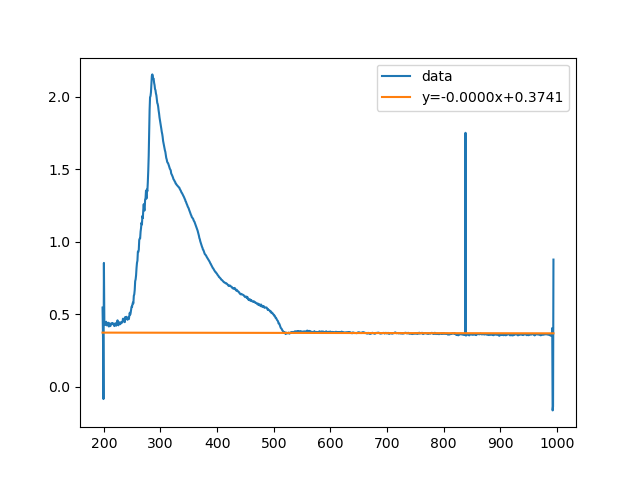

In [29]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
x_range=[700, 900]
idx0, v0 = find_nearest(x, x_range[0])
idx1, v1 = find_nearest(x, x_range[1])
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[700, 900])

In [30]:
# title.append('dummy')
# title

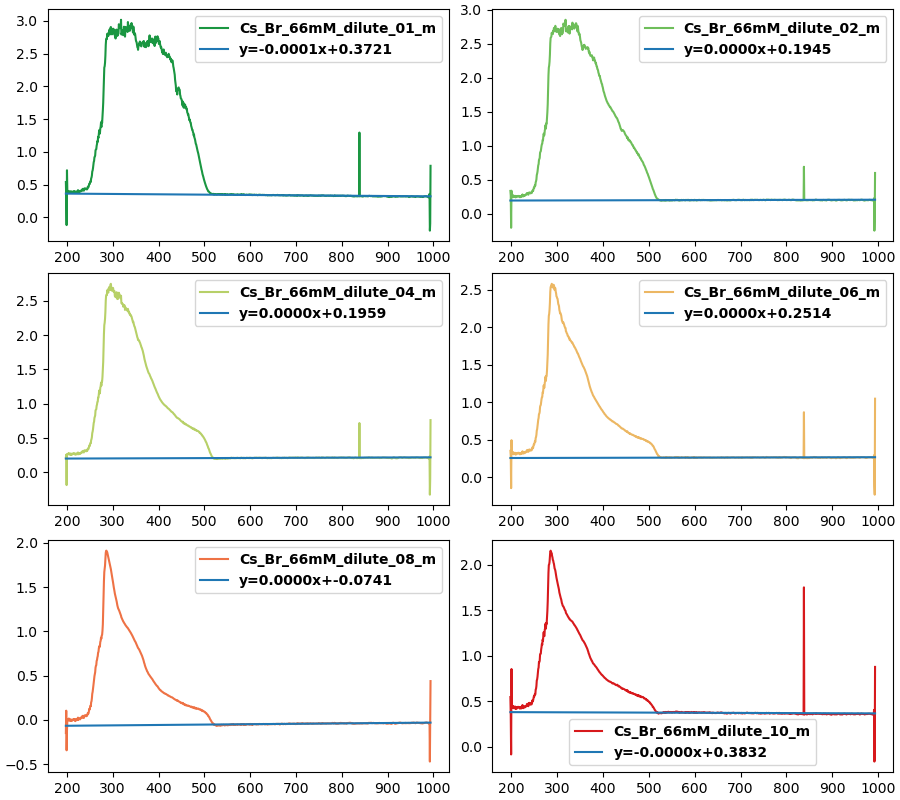

In [31]:
rows = 3
cols = 2
f3, ax3 = plt.subplots(rows, cols, figsize = (9, 8), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22
x_range_list = [[600, 900], [600, 900], 
                [600, 900], [600, 900], 
                [400, 900], [800, 900],
               ]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    try:
        x = df2[keys_list2[i*2]]
        y = df2[keys_list2[i*2+1]]
        popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[0], plot=False)
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
        df4[keys_list2[i*2]] = x
        # df4[keys_list2[i*2+1]] = y - popt[1]
        df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    
    except (KeyError, IndexError):
        pass

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

In [32]:
title = keys_list2[1::2]
title

['Cs_Br_66mM_dilute_01_mean',
 'Cs_Br_66mM_dilute_02_mean',
 'Cs_Br_66mM_dilute_04_mean',
 'Cs_Br_66mM_dilute_06_mean',
 'Cs_Br_66mM_dilute_08_mean',
 'Cs_Br_66mM_dilute_10_mean']

## Plot Abs by offset

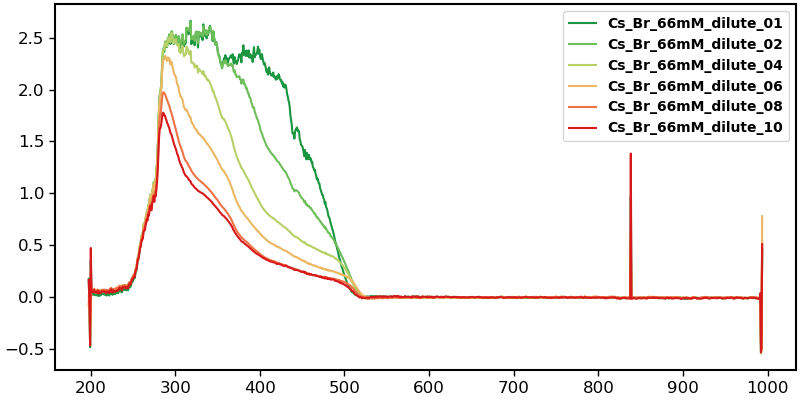

In [33]:
f4, ax4 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax4.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [34]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_Cs_Br_66mM_dilute_01',
 'Cs_Br_66mM_dilute_01_mean',
 'x_Cs_Br_66mM_dilute_02',
 'Cs_Br_66mM_dilute_02_mean',
 'x_Cs_Br_66mM_dilute_04',
 'Cs_Br_66mM_dilute_04_mean',
 'x_Cs_Br_66mM_dilute_06',
 'Cs_Br_66mM_dilute_06_mean',
 'x_Cs_Br_66mM_dilute_08',
 'Cs_Br_66mM_dilute_08_mean',
 'x_Cs_Br_66mM_dilute_10',
 'Cs_Br_66mM_dilute_10_mean']

## Save offset data as csv

In [35]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

Cs_Br_66mM_dilute_01_offset.csv
Cs_Br_66mM_dilute_02_offset.csv
Cs_Br_66mM_dilute_04_offset.csv
Cs_Br_66mM_dilute_06_offset.csv
Cs_Br_66mM_dilute_08_offset.csv
Cs_Br_66mM_dilute_10_offset.csv


## Save Absorbance at 365 nm

In [36]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][1::2].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][1::2].to_list()
df_365

,Data_source,Abs_365,Abs_offset_365
0,Cs_Br_66mM_dilute_01_mean,2.663195,2.310118
1,Cs_Br_66mM_dilute_02_mean,2.436081,2.236166
2,Cs_Br_66mM_dilute_04_mean,1.786248,1.582154
3,Cs_Br_66mM_dilute_06_mean,1.355983,1.099740
4,Cs_Br_66mM_dilute_08_mean,0.713049,0.770828
5,Cs_Br_66mM_dilute_10_mean,1.085609,0.708702


In [37]:
# df_365.to_csv(os.path.join(new_dir, 'Cs_Br_66mM_sapphire_abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [38]:
# df_365.to_csv('Cs_Br_66mM_sapphire_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [39]:
df2.keys()

Index(['x_Cs_Br_66mM_dilute_01', 'Cs_Br_66mM_dilute_01_mean',
       'x_Cs_Br_66mM_dilute_02', 'Cs_Br_66mM_dilute_02_mean',
       'x_Cs_Br_66mM_dilute_04', 'Cs_Br_66mM_dilute_04_mean',
       'x_Cs_Br_66mM_dilute_06', 'Cs_Br_66mM_dilute_06_mean',
       'x_Cs_Br_66mM_dilute_08', 'Cs_Br_66mM_dilute_08_mean',
       'x_Cs_Br_66mM_dilute_10', 'Cs_Br_66mM_dilute_10_mean'],
      dtype='object')

## Import analysis functions

In [40]:
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

## Gaussian peak fittimg

In [41]:
# keys_list.append('x_dummy')
# keys_list.append('dummy')
# keys_list

x_Cs_Br_66mM_dilute_01 passes c1 so is good.

** Average of Cs_Br_66mM_dilute_01_mean has peaks at [ 14  34  70 132 191 211 239 260 288 316 352 376 404 441 464 493 514]**


** start to do peak fitting by Gaussian**

x_Cs_Br_66mM_dilute_02 passes c1 so is good.

** Average of Cs_Br_66mM_dilute_02_mean has peaks at [ 14  37  57 143 211 233 254 277 316 352 376 404 441 464 493 514]**


** start to do peak fitting by Gaussian**

x_Cs_Br_66mM_dilute_04 passes c1 so is good.

** Average of Cs_Br_66mM_dilute_04_mean has peaks at [  1  24  49  70 144 229 254 277 312 337 376 404 441 464 493 515]**


** start to do peak fitting by Gaussian**

x_Cs_Br_66mM_dilute_06 passes c1 so is good.

** Average of Cs_Br_66mM_dilute_06_mean has peaks at [  1  24  44 148 224 247 273 312 352 376 404 441 464 492 514]**


** start to do peak fitting by Gaussian**

x_Cs_Br_66mM_dilute_08 passes c1 so is good.

** Average of Cs_Br_66mM_dilute_08_mean has peaks at [ 17  37 146 239 260 282 316 352 376 404 441 464 492 

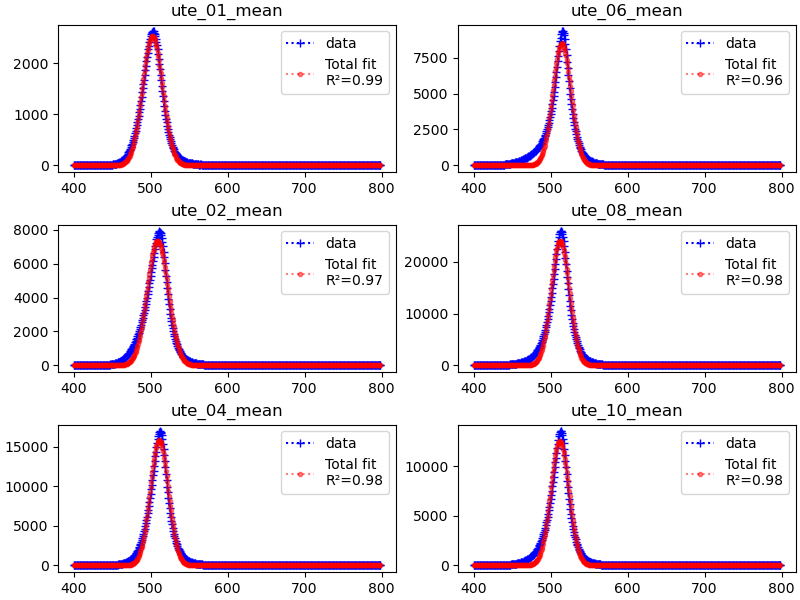

In [42]:
rows = 3
cols = 2
f5, ax5 = plt.subplots(rows, cols, figsize = (8, 6), constrained_layout=True)
# ax4 = ax4.flatten()
wl1 = 400
wl2 = 800
idx1, w1 = find_nearest(df[keys_list[0]], wl1)
idx2, w2 = find_nearest(df[keys_list[0]], wl2)

key_x_reshape = np.asarray(keys_list[0::2]).reshape(cols, rows).T
key_y_reshape = np.asarray(keys_list[1::2]).reshape(cols, rows).T

peak_list = []
fwhm = []
simpson_int = []

for i in range(cols):
    for j in range(rows):
        #i = 4
        try:
            x0 = df[key_x_reshape[j][i]][idx1:idx2].to_numpy()
            y0 = df[key_y_reshape[j][i]][idx1:idx2].to_numpy()
            #_2peak_fit_PL(x,y, distr='G', height=1000, second_peak=-4, plot=True, plot_title=os.path.basename(subfolder[i]))

            peak, prop = good_bad_data(x0, y0, key_height=1, data_id = f'{key_x_reshape[j][i]}', distance=20, height=1)
            x, y, p, f, popt = _fitting_in_kafka(x0, y0, f'{key_y_reshape[j][i]}', peak, prop)  


            simpson_int.append(integrate.simpson(y,x))
            peak_list.append(popt[1])
            fwhm.append(2.355*popt[2])


            fitted_result = f(x, *popt)
            r_2 = r_square(x, y, fitted_result)
            r2 = f'R\u00b2={r_2:.2f}'
            ax5[j][i].set_title(key_y_reshape[j][i][14:27])
            ax5[j][i].plot(x,y,'b+:',label='data')
            ax5[j][i].plot(x,fitted_result,'ro:',label='Total fit\n'+r2, alpha=0.5, markersize=3)

        #     # peak 1
        #     peak_1 = _1gauss(x, *popt[0:3])
        #     ax4[i].plot(x, peak_1, "g", label='peak 1')
        #     ax4[i].fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)

        #     # peak 2
        #     peak_2 = _1gauss(x, *popt[3:6])
        #     ax4[i].plot(x, peak_2, "y", label='peak 2')
        #     ax4[i].fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)

            ax5[j][i].legend()
        
        except (KeyError, IndexError):
            pass

In [43]:
simpson_int

[86814.21801206282,
 267242.57943564514,
 495227.3368530671,
 280389.71180158434,
 769849.6422202016,
 400580.35290870775]

## Plot PE, FWHM, PLQY

In [44]:
def plqy_quinine(absorbance_sample, PL_integral_sample, refractive_index_solvent, 
                     absorbance_reference, PL_integral_reference, refractive_index_reference, plqy_reference):
    
    integral_ratio = PL_integral_sample / PL_integral_reference
    absorbance_ratio = absorbance_reference / absorbance_sample
    refractive_index_ratio = (refractive_index_solvent / refractive_index_reference)**2

    plqy = plqy_reference * integral_ratio * absorbance_ratio * refractive_index_ratio
    return plqy

In [45]:
df_365['Abs_offset_365']

0    2.310118
1    2.236166
2    1.582154
3    1.099740
4    0.770828
5    0.708702
Name: Abs_offset_365, dtype: float64

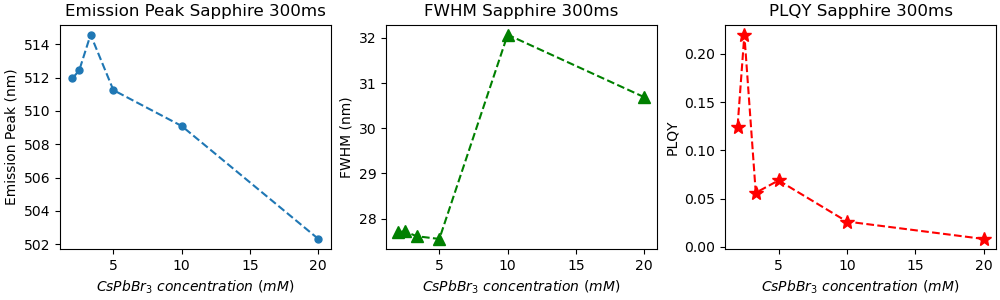

In [46]:
# abs_365 = df11.iloc[210][1::2].to_numpy()
abs_365 = df_365['Abs_offset_365']

abs_365_r = 0.151405 #0.360459 ## 0.231965  ##  20240227_quinine_plqy.ipynb: 2E-4M_300ms_mean
plqy_r = 0.546
ref_idx_toluene = 1.506
ref_idx_H2SO4 = 1.337
integral_r = 476742.228305 #295825.609793  ##  20240227_quinine_plqy.ipynb: 2E-4M_300ms_mean
integral_pqds = np.asarray(simpson_int)

plqy = plqy_quinine(abs_365, integral_pqds, 1.506, abs_365_r, integral_r, 1.337, 0.546)
# plqy_4000ms = plqy_quinine(abs_365, integral_pqds[1::2], 1.506, abs_365_r, integral_r[1], 1.337, 0.546)
    

# dilute_constant = np.asarray([1,8,16,24])
dilute_constant = np.asarray(dilute_ratio)
x_list = 20 * dilute_constant
# x_list_T = np.asarray(x_list).reshape(cols, rows).T
# peak_list_T = np.asarray(peak_list).reshape(cols, rows).T
# fwhm_T = np.asarray(fwhm).reshape(cols, rows).T
# plqy_T = np.asarray(plqy).reshape(cols, rows).T

rows = 1
cols = 3
integration_time = ['Sapphire 300ms']

f5, ax5 = plt.subplots(rows, cols, figsize = (10, 3), constrained_layout=True)
# for i in range(rows):
ax5[0].set_title(f'Emission Peak {integration_time[0]}')
ax5[0].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[0].set_ylabel('Emission Peak (nm)')
ax5[1].set_title(f'FWHM {integration_time[0]}')
ax5[1].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[1].set_ylabel('FWHM (nm)')
ax5[2].set_title(f'PLQY {integration_time[0]}')
ax5[2].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[2].set_ylabel('PLQY')


ax5[0].plot(x_list, peak_list, '.--', markersize=10)
ax5[1].plot(x_list, fwhm, 'g^--', markersize=8)
ax5[2].plot(x_list, plqy, 'r*--', markersize=10)

In [47]:
plqy

0    0.008268
1    0.026293
2    0.068864
3    0.056093
4    0.219728
5    0.124355
Name: Abs_offset_365, dtype: float64

In [48]:
x_list

array([20.        , 10.        ,  5.        ,  3.33333333,  2.5       ,
        2.        ])